In [117]:
import pandas as pd
import numpy as np
import pickle

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
DATA_PATH = '../data/'

In [3]:
with open(DATA_PATH + 'data_cleaned.pickle', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
data

,url,target,day,url_cleaned,target_cleaned
0,https://www.cdiscount.com/bricolage/electricit...,"[1831, 1751, 1192, 745, 1703]",4,cdiscount bricolage electricite batterie plomb...,[1192]
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4,mystalk profile vitoriafcorrea,"[978, 582, 529]"
2,https://www.lequipe.fr/Tennis/TennisFicheJoueu...,"[20, 1077, 294]",4,lequipe Tennis Tennis Fiche,"[1077, 294]"
3,http://m.jeuxvideo.com/forums/42-32625-6018005...,"[381, 935, 1343, 622, 933]",4,jeuxvideo forums guilde fourmi legionnaire rec...,"[381, 935, 1343, 622, 933]"
4,https://context.reverso.net/traduction/espagno...,"[692, 1265, 725, 1264, 1266]",4,context reverso traduction espagnol francais Para,"[692, 1265, 725, 1264, 1266]"
...,...,...,...,...,...
63234,http://www.allocine.fr/personne/fichepersonne_...,"[1107, 1096, 1310, 1106, 184]",16,allocine personne fichepersonne gen cpersonne,"[1107, 1096, 1310, 1106, 184]"
63235,https://www.sto.cx/book-186042-471.html,"[608, 617, 1033, 220, 1021]",1,sto book,"[608, 617, 220, 1021]"
63236,http://jeu.info/solution/4-images-1-mot-niveau...,"[381, 925, 622, 1494, 937]",16,jeu info solution images mot niveau,"[381, 925, 622, 1494, 937]"
63237,https://grossesse.aufeminin.com/forum/levres-g...,"[638, 253, 419, 558, 401]",1,grossesse aufeminin forum levres gonflees acco...,"[253, 419, 558, 401]"


In [10]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<AxesSubplot:>

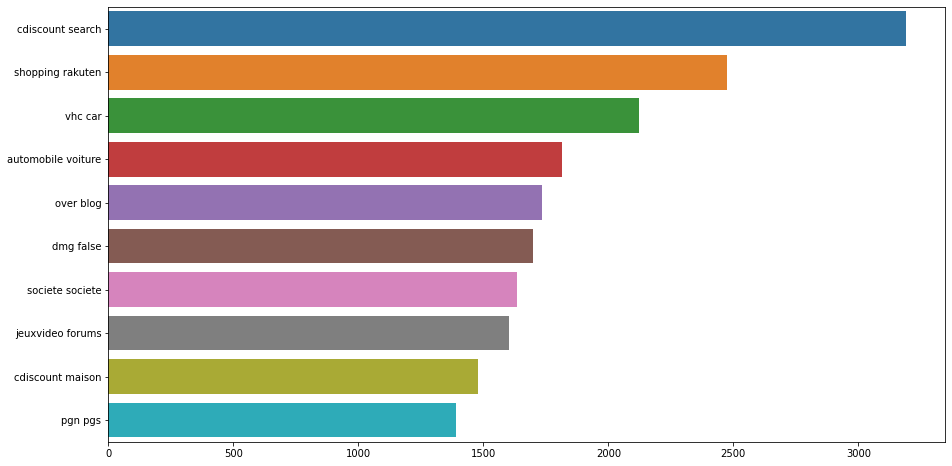

In [14]:
### 2-grams top plotting
top_n_bigrams= get_top_ngram(data['url_cleaned'], 2)[:10] 
x, y = map(list,zip(*top_n_bigrams))
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x)

<AxesSubplot:>

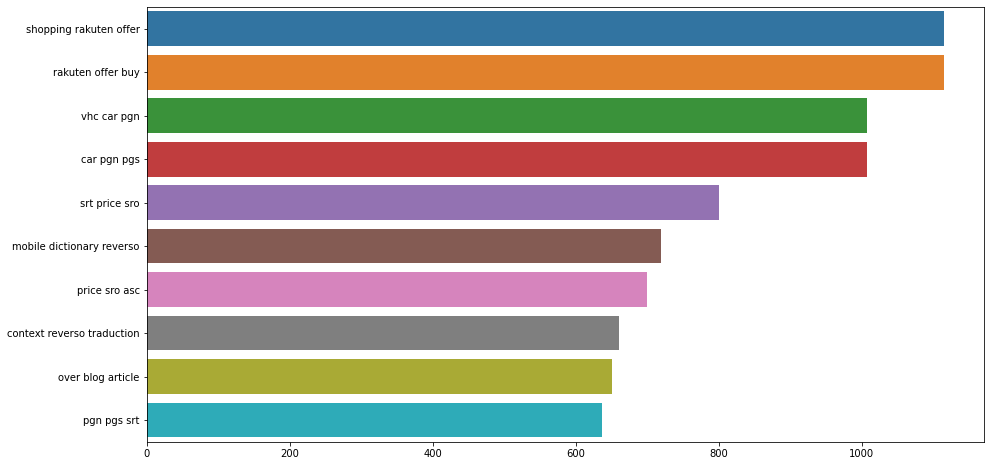

In [16]:
### 3-grams top plotting
top_n_bigrams= get_top_ngram(data['url_cleaned'], 3)[:10] 
x, y = map(list,zip(*top_n_bigrams))
plt.figure(figsize=(15,8))
sns.barplot(x=y,y=x)

In [38]:
# Tokenization
data['url_processed'] = data['url_cleaned'].progress_apply(word_tokenize)
data.head()

  0%|          | 0/63239 [00:00<?, ?it/s]

,url,target,day,url_cleaned,target_cleaned,url_tokenized,url_processed
0,https://www.cdiscount.com/bricolage/electricit...,"[1831, 1751, 1192, 745, 1703]",4,cdiscount bricolage electricite batterie plomb...,[1192],"[cdiscount, bricolage, electricite, batterie, ...","[cdiscount, bricolage, electricite, batterie, ..."
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4,mystalk profile vitoriafcorrea,"[978, 582, 529]","[mystalk, profile, vitoriafcorrea]","[mystalk, profile, vitoriafcorrea]"
2,https://www.lequipe.fr/Tennis/TennisFicheJoueu...,"[20, 1077, 294]",4,lequipe Tennis Tennis Fiche,"[1077, 294]","[lequipe, tennis, tennis, fiche]","[lequipe, Tennis, Tennis, Fiche]"
3,http://m.jeuxvideo.com/forums/42-32625-6018005...,"[381, 935, 1343, 622, 933]",4,jeuxvideo forums guilde fourmi legionnaire rec...,"[381, 935, 1343, 622, 933]","[jeuxvideo, forums, guilde, fourmi, legionnair...","[jeuxvideo, forums, guilde, fourmi, legionnair..."
4,https://context.reverso.net/traduction/espagno...,"[692, 1265, 725, 1264, 1266]",4,context reverso traduction espagnol francais Para,"[692, 1265, 725, 1264, 1266]","[context, reverso, traduction, espagnol, franc...","[context, reverso, traduction, espagnol, franc..."


In [39]:
data['url_processed'] = data['url_processed'].progress_apply(lambda x: [word.lower() for word in x])

  0%|          | 0/63239 [00:00<?, ?it/s]

In [40]:
import string
# Removing Punctuations
punc = string.punctuation
data['url_processed'] = data['url_processed'].progress_apply(lambda x: [word for word in x if word not in punc])

  0%|          | 0/63239 [00:00<?, ?it/s]

In [41]:
# Removing Stopwords
stop_words = set(stopwords.words('english') + stopwords.words('french'))
data['url_processed'] = data['url_processed'].progress_apply(lambda x: [word for word in x if word not in stop_words])
data.head()

  0%|          | 0/63239 [00:00<?, ?it/s]

,url,target,day,url_cleaned,target_cleaned,url_tokenized,url_processed
0,https://www.cdiscount.com/bricolage/electricit...,"[1831, 1751, 1192, 745, 1703]",4,cdiscount bricolage electricite batterie plomb...,[1192],"[cdiscount, bricolage, electricite, batterie, ...","[cdiscount, bricolage, electricite, batterie, ..."
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4,mystalk profile vitoriafcorrea,"[978, 582, 529]","[mystalk, profile, vitoriafcorrea]","[mystalk, profile, vitoriafcorrea]"
2,https://www.lequipe.fr/Tennis/TennisFicheJoueu...,"[20, 1077, 294]",4,lequipe Tennis Tennis Fiche,"[1077, 294]","[lequipe, tennis, tennis, fiche]","[lequipe, tennis, tennis, fiche]"
3,http://m.jeuxvideo.com/forums/42-32625-6018005...,"[381, 935, 1343, 622, 933]",4,jeuxvideo forums guilde fourmi legionnaire rec...,"[381, 935, 1343, 622, 933]","[jeuxvideo, forums, guilde, fourmi, legionnair...","[jeuxvideo, forums, guilde, fourmi, legionnair..."
4,https://context.reverso.net/traduction/espagno...,"[692, 1265, 725, 1264, 1266]",4,context reverso traduction espagnol francais Para,"[692, 1265, 725, 1264, 1266]","[context, reverso, traduction, espagnol, franc...","[context, reverso, traduction, espagnol, franc..."


In [43]:
data['url_processed'] = data['url_processed'].progress_apply(lambda x: ' '.join(word for word in x ))
data.head()

  0%|          | 0/63239 [00:00<?, ?it/s]

,url,target,day,url_cleaned,target_cleaned,url_tokenized,url_processed
0,https://www.cdiscount.com/bricolage/electricit...,"[1831, 1751, 1192, 745, 1703]",4,cdiscount bricolage electricite batterie plomb...,[1192],"[cdiscount, bricolage, electricite, batterie, ...",cdiscount bricolage electricite batterie plomb...
1,https://www.mystalk.net/profile/vitoriafcorrea,"[847, 978, 582, 1381, 529]",4,mystalk profile vitoriafcorrea,"[978, 582, 529]","[mystalk, profile, vitoriafcorrea]",mystalk profile vitoriafcorrea
2,https://www.lequipe.fr/Tennis/TennisFicheJoueu...,"[20, 1077, 294]",4,lequipe Tennis Tennis Fiche,"[1077, 294]","[lequipe, tennis, tennis, fiche]",lequipe tennis tennis fiche
3,http://m.jeuxvideo.com/forums/42-32625-6018005...,"[381, 935, 1343, 622, 933]",4,jeuxvideo forums guilde fourmi legionnaire rec...,"[381, 935, 1343, 622, 933]","[jeuxvideo, forums, guilde, fourmi, legionnair...",jeuxvideo forums guilde fourmi legionnaire rec...
4,https://context.reverso.net/traduction/espagno...,"[692, 1265, 725, 1264, 1266]",4,context reverso traduction espagnol francais Para,"[692, 1265, 725, 1264, 1266]","[context, reverso, traduction, espagnol, franc...",context reverso traduction espagnol francais para


In [35]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_transformed = mlb.fit_transform(data['target_cleaned'])

In [52]:
from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(data['url_processed'], y_transformed, test_size=0.1, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1234)

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer="word", ngram_range=(1, 2), max_features=5000)
X_train_encoded = tf.fit_transform(X_train)

In [77]:
X_val_encoded = tf.transform(X_val)

In [68]:
X_train_encoded[0].shape

(1, 5000)

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

from sklearn.multiclass import OneVsRestClassifier

from sklearn import metrics

In [106]:
# models to test
classifiers = [
    LogisticRegression(solver="sag", random_state=1),
    LinearSVC(random_state=1),
    XGBClassifier(objective="binary:logistic", eval_metric="logloss", random_state=1),
    MLPClassifier(
        random_state=1,
        solver="adam",
        hidden_layer_sizes=(12, 12, 12),
        activation="relu",
        early_stopping=True,
        n_iter_no_change=1,
    ),
]

clf_names = ["LR", "LSVC", "XGB", "MLP"]

In [107]:
### calculate necessairy fucntions
def evaluation_scores(y_test, predicted):
    return {"Accuracy": metrics.accuracy_score(y_test, predicted, normalize=True),  # Test with normalize=False
            "Hamming loss": metrics.hamming_loss(y_test, predicted),
            "AUC": metrics.roc_auc_score(y_test, predicted),
            "F1 score macro": metrics.f1_score(y_test, predicted, average='macro', zero_division=0),
            "F1 score micro": metrics.f1_score(y_test, predicted, average='micro', zero_division=0),
            "F1 score weighted": metrics.f1_score(y_test, predicted, average='weighted', zero_division=0)}

In [118]:
%%time
# test all classifiers and save pred. results on test data
results = {}
for name, clf in zip(clf_names, classifiers):
    print(f"Training classifier: {name}")
    pipe = OneVsRestClassifier(clf)
    pipe.fit(X_train_encoded, y_train)
    prediction = pipe.predict(X_val_encoded)
    report = evaluation_scores(y_val, prediction)
    results[name] = report

Training classifier: LR
Training classifier: LSVC
Training classifier: XGB


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Training classifier: MLP
Wall time: 21min 9s


In [121]:
print(pd.DataFrame.from_dict(results).T.to_markdown())

|      |   Accuracy |   Hamming loss |      AUC |   F1 score macro |   F1 score micro |   F1 score weighted |
|:-----|-----------:|---------------:|---------:|-----------------:|-----------------:|--------------------:|
| LR   |   0.121936 |     0.00891236 | 0.653643 |         0.396298 |         0.538858 |            0.49323  |
| LSVC |   0.171484 |     0.00831222 | 0.70922  |         0.503603 |         0.607955 |            0.577387 |
| XGB  |   0.151981 |     0.00873008 | 0.702646 |         0.488    |         0.584884 |            0.555727 |
| MLP  |   0.101116 |     0.00913117 | 0.635244 |         0.300006 |         0.543177 |            0.457907 |
